## Visualizing Vast Data

The main drive for this project is to visualize the entirety of the World Bank's data in one graph. Visualizing raw data empowers decision-makers, rather than outsourcing awareness to computers. 

Often, I recall climbing and staring up at Yosemite's 2000 foot granite walls. After many days, a noticable shift occured in my perception, and I began to *feel* the vastness of the rock differently from before. I would like to see data-owners regard their data in this way, as opposed to an immediate jump to aggregation and computation. 

Additionally, the artist in me seeks to improve the aesthetics of my data products. I believe there are side-long impacts of doing this that cannot be predicted beforehand. If nothing else, beautiful data visualization can be used as an alternative to in-house dashboards, or given to the public in a marketing context.

Thank you for joining me!

In [2]:
### Setup ###
from csv import reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from pandasql import *

filepath = "/Users/zachpolitz/Desktop/WorldBank_ESG.csv"

### Open data file ###
ESG_opened = open(filepath)
ESG_read_csv = pd.read_csv(ESG_opened)
ESG_raw = pd.DataFrame(ESG_read_csv)
ESG_cols = ESG_raw.columns

### Move '1961' after '1960' ###
sixty_one = ESG_raw['1961']
ESG_raw.drop(['1961'], axis = 1,inplace = True)
ESG_raw.insert(loc = 5, column = '1961', value = 0)
ESG_raw['1961'] = sixty_one

### Drop unused columns ###
ESG_raw = ESG_raw.drop(['Country Code','Indicator Code','2050'], axis = 1)

### Extract header from first row of data ###

### Separate dataset into country and regional rows ###
ESG_by_country = ESG_raw.iloc[3082:]
ESG_by_region = ESG_raw.iloc[0:3082]



### Create lists of unique years, indicies, and countries 
ESG_indicies = ESG_raw['Indicator Name'].unique()
ESG_years = ESG_raw.columns[2:] # get all columns except'Country Name' and 'Indicator Name'.
ESG_countries = ESG_by_country['Country Name'].unique()
ESG_regions = ESG_by_region['Country Name'].unique()

### First, I'll get a basic overview of the dataset: 

In [8]:
ESG_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16013 entries, 0 to 16012
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16013 non-null  object 
 1   Indicator Name  16013 non-null  object 
 2   1960            1356 non-null   float64
 3   1961            1955 non-null   float64
 4   1962            2192 non-null   float64
 5   1963            1966 non-null   float64
 6   1964            1978 non-null   float64
 7   1965            2017 non-null   float64
 8   1966            2018 non-null   float64
 9   1967            2260 non-null   float64
 10  1968            2037 non-null   float64
 11  1969            2048 non-null   float64
 12  1970            3084 non-null   float64
 13  1971            3589 non-null   float64
 14  1972            3833 non-null   float64
 15  1973            3585 non-null   float64
 16  1974            3596 non-null   float64
 17  1975            3935 non-null  

### Immediately I notice a number of things:
- Data collection occured from 1960 to 2020
- All data types are floats (decimals)
- The number of non-null data points (reported metrics) increases steadily until 2015, at which time reporting drops dramatically.

### I want to take a closer look at the distribution of Null values, or the volume of reported values annually.

To do so, I will create three dictionaries:
- 1st   {country: {year: sum_across_indicies(nulls) }}
- 2nd   {region: {year: sum_across_indicies(nulls) }}
- 3rd   {index: {year: sum_across_countries(nulls) }}

In [9]:
### Reporting activity/ null counts {country: year: sum_across_indicies(nulls)} ###
annual_null_counts = {}

for country in ESG_countries: 
    year_raw = ESG_by_country[ESG_by_country['Country Name'] == country]
    year_nulls = {}
    for year in ESG_years:
        nulls = 0
        years_data = year_raw[year]
        for indx in years_data:
            indx = str(indx)
            # data type is float, but value prints 'nan'
            if indx == 'nan':
                nulls += 1
        year_nulls[year] = nulls
    annual_null_counts[country] = year_nulls


In [10]:
### Reporting density dictionary: {region: year: sum_across_indicies(nulls)} ###
annual_null_counts_region = {}
for region in ESG_regions: 
    year_raw = ESG_by_region[ESG_by_region['Country Name'] == region]
    year_nulls = {}
    for year in ESG_years:
        nulls = 0
        years_data = year_raw[year]
        for indx in years_data:
            indx = str(indx)
            if indx == 'nan':
                nulls += 1
        year_nulls[year] = nulls
    annual_null_counts_region[region] = year_nulls

In [11]:
### Reporting density dictionary: {index: year: sum_across_countries(nulls)}

index_nulls_annual_sum = {}
for indx in ESG_indicies:
    index_nulls_annual_sum[indx] = {}
    d_set = ESG_by_country[ESG_by_country['Indicator Name'] == indx] # One index
    for year in ESG_years:  # One year
        d_vec = d_set[year]
        d = 0
        for row in d_vec: # One country
            if str(row) == 'nan': # Is the value null?
                d+= 1
        index_nulls_annual_sum[indx][year]= d

### Get a 30,000 foot view of the data

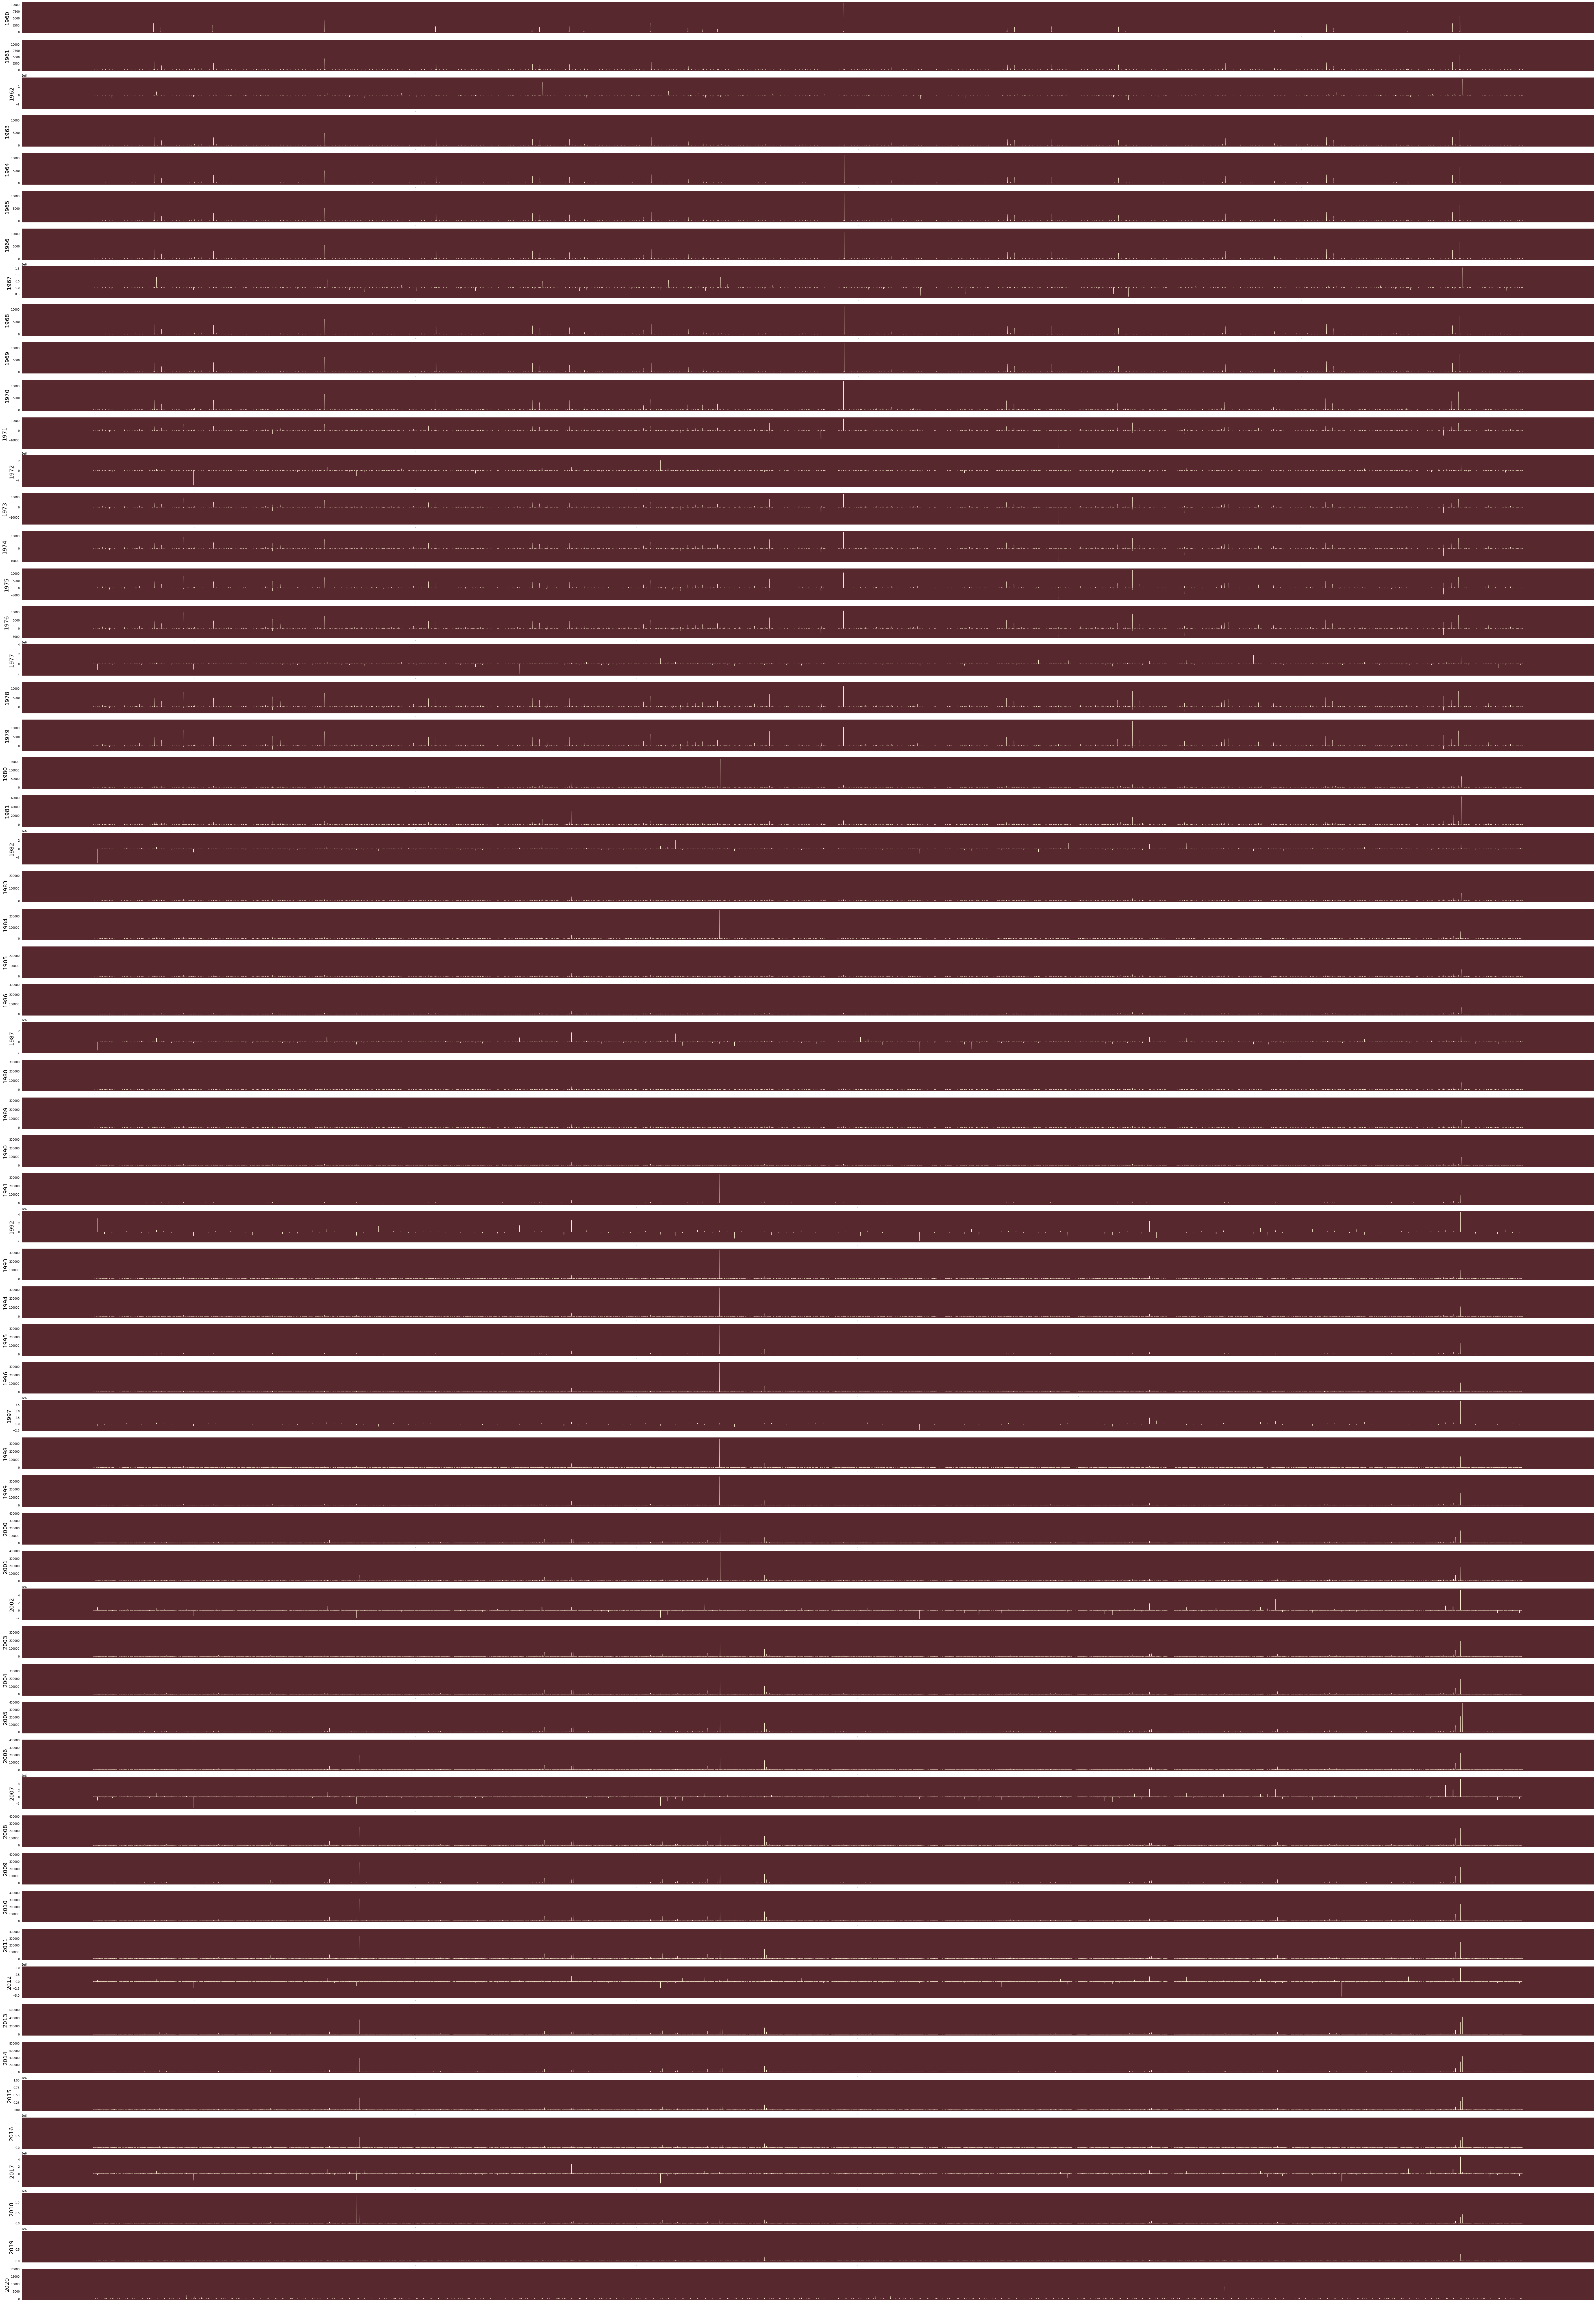

In [23]:
# Small mulitples: bar charts of raw values recorded each year.


# Figure setup
fig, ax = plt.subplots(len(ESG_years),1)
fig.set_figwidth(100)
fig.set_figheight(150)


for y in range (0,(len(ESG_years))):
    d2_set = ESG_by_country[ESG_years[y]]

    ax[y].plot(d2_set, c = [.992,.922,.816])
    
    ax[y].grid(False)
    ax[y].set_title("",fontsize = 14)
    ax[y].set_ylabel(ESG_years[y], fontsize = 20)
    ax[y].tick_params(axis = 'x',labelsize = 0, bottom = False, rotation = 90)
    ax[y].tick_params(axis = 'y', left = False)

    #ax[y].set_ylim(-100000,100000)
    
    ax[y].set_facecolor([.341,.160,.18])
    ax[y].spines['right'].set_visible(False)
    ax[y].spines['top'].set_visible(False)
    ax[y].spines['left'].set_visible(False)
    ax[y].spines['bottom'].set_visible(False)

plt.show()

#### Reflections:
- There are cycles of reporting for certain metrics (ex: negative values)
- Over time, bar height and reporting density increases.
- There appear to be "eras" of reporting.

## Plotting nulls: 
Now I'll explore whether reporting occured. A given cell will provide a value or it will show up as "null". These plots will disregard the actual value, and will instead look at how data collection behaves.

2806 46


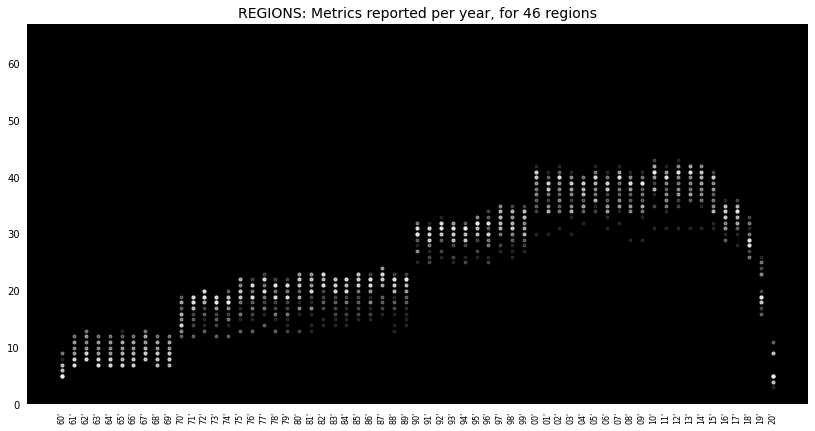

In [26]:
### number of reported metrics for each region, by year.

x=[]
y=[]

for year in ESG_years:
    for region in ESG_regions:
        year_string = str(year)
        x.append(year_string[-2:] + "'")
        y.append(67-annual_null_counts_region[region][year])

print(len(y),len(ESG_regions))
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(7)

ax.set_title("REGIONS: Metrics reported per year (46 regions)",fontsize = 14)
ax.set_ylabel("")
ax.tick_params(axis = 'x',labelsize = 8, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.set_ylim(top=67)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_facecolor("black")
ax.scatter(x,y,marker = '.',c = 'white',alpha=.11)

plt.show()

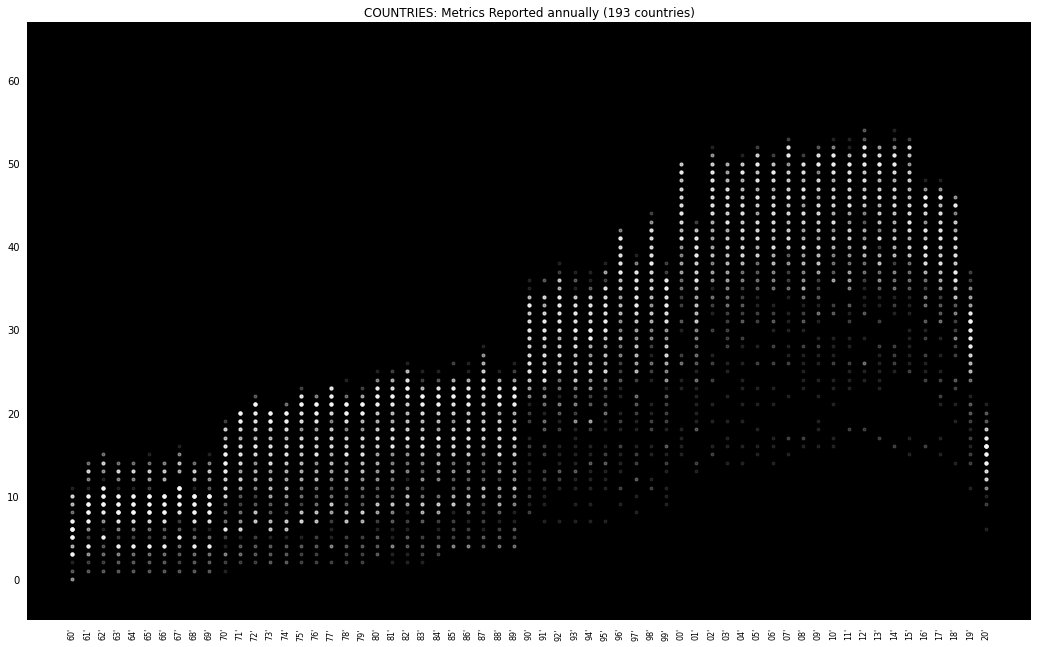

In [29]:
### number of reported metrics for each country, by year. Each dot 

x=[]
y=[]

for year in ESG_years:
    for country in ESG_countries:
        year_string = str(year)
        x.append(year_string[-2:] + "'")
        y.append(67-annual_null_counts[country][year])
 
    
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(11)

ax.set_ylim(bottom = -5, top=67)
ax.set_title("COUNTRIES: Metrics Reported annually (193 countries)")

ax.tick_params(axis = 'x',labelsize = 8, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.grid(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('black')

ax.scatter(x,y,marker = '.',c='white', alpha = .1)
plt.show()

#### Reflection:
- 1990 appears to have a major shift in how WorldBank conducted it's data collection.
- 2015 begins a considerable drop-off in collection.
- No country ever provides data for all the metrics generated.
- There is always a dense mass of countries that report high numbers of metrics, and a layer below it with far fewer metrics being reported. 

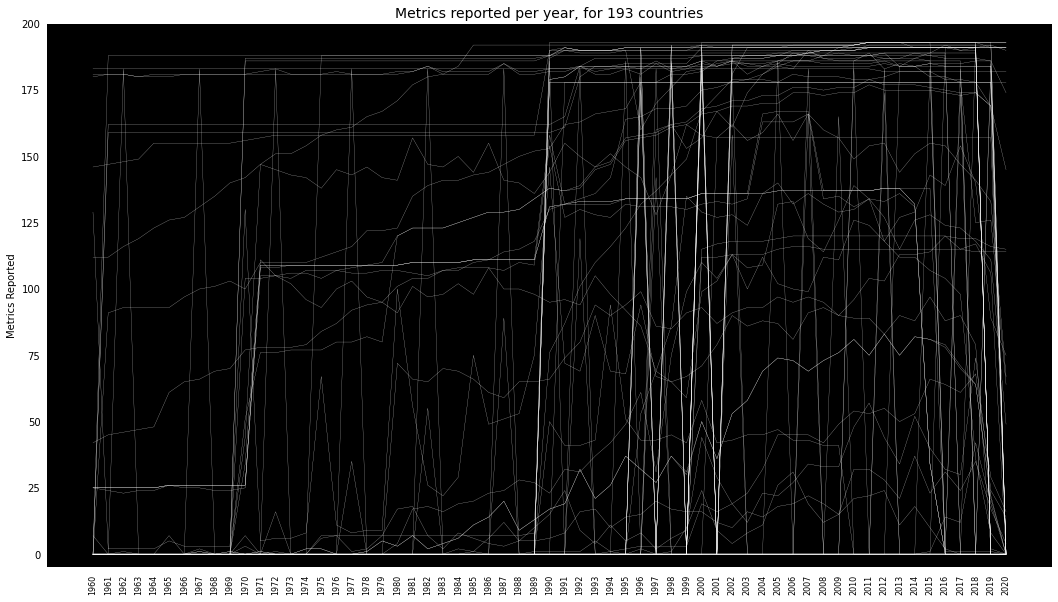

In [30]:
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
ax.set_ylim(top=200,bottom = -5)
ax.set_ylabel("Metrics Reported")
ax.tick_params(axis = 'x',labelsize = 8, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.set_title("Metrics reported per year, for 193 countries",fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

index_count = 0
for indx in ESG_indicies:
    x = []
    y = []
    for year in ESG_years:
        d = index_nulls_annual_sum[indx][year]
        x.append(193 - d)
        y.append(year)
    ax.plot(y,x, c = 'white', lw = .2)

ax.set_facecolor('black')
   

#### Reflection:
- We can see the cyclical reporting of certain metrics, showing rhythmic spikes.
- There are metrics that have consistently recieved reporting, and some that have poor adherence.
- A handfull of metrics have had high levels of collection since 1960, and another that never get collected.
- Generally, metrics gain reporting volume over time.

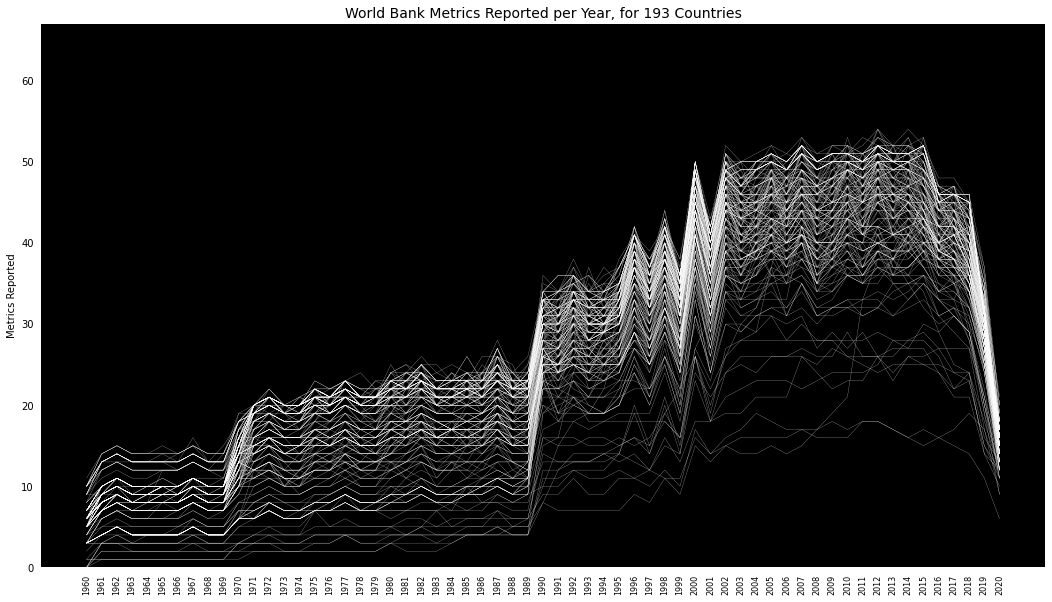

In [31]:
### Plot Line Graph for every country's number of metrics reported

fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
ax.set_ylim(top=67)
ax.set_ylabel("Metrics Reported")
ax.tick_params(axis = 'x',labelsize = 8, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.set_title("World Bank Metrics Reported per Year, for 193 Countries",fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

country_count = 0
for country in ESG_countries:
    x = []
    y = []
    for year in ESG_years:
        d = annual_null_counts[country][year]
        x.append(67 - d)
        y.append(year)
    ax.plot(y,x, c = 'white', lw = .2)
    country_count += 1
ax.set_facecolor('black')

#### Reflection:

- While reporting volume increased over the years, it became much more chaotic after the nineties. 
- A small number of countries experience large changes in the numbers of metrics they report. Most experience a steady increase. 

### Visualizing Reported Values:
- Many indicies have units that, unstandardized, will be incompatible on a graph with other indicies.
- A large proportion of indicies provide percentages, which will let me merge them without standardization.

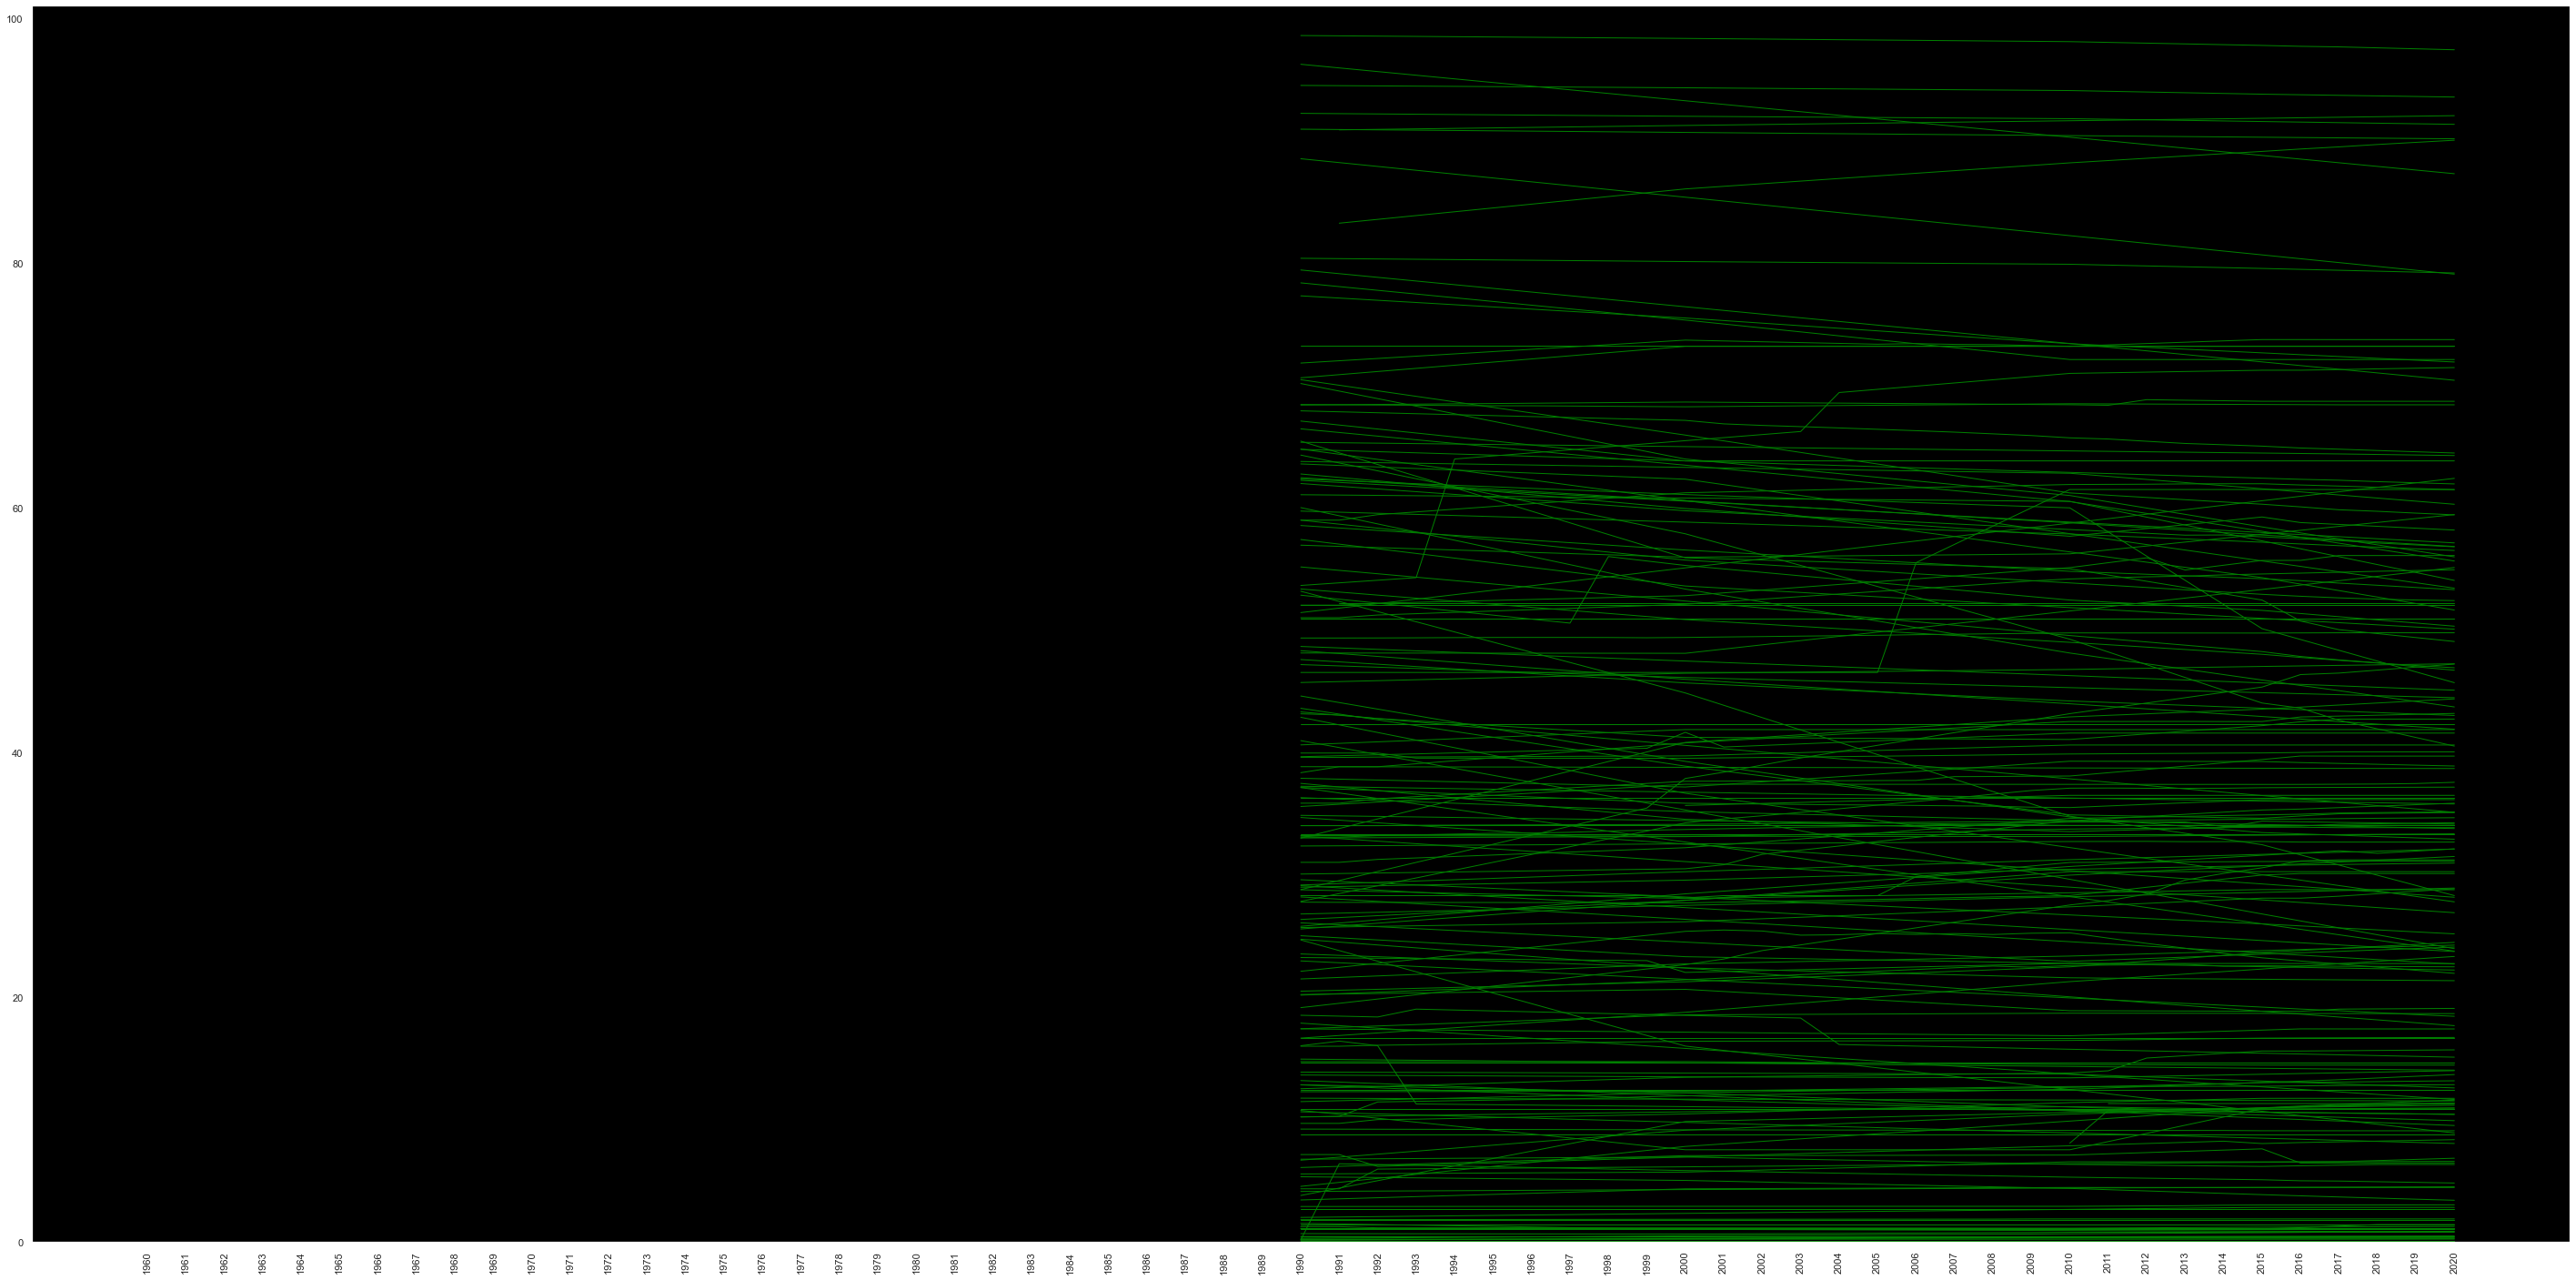

In [97]:

# Internet, renewables, pop_den

c_water = ESG_by_country[ESG_by_country['Indicator Name'] == 'People using safely managed drinking water services (% of population)']
forested = ESG_by_country[ESG_by_country['Indicator Name'] == 'Forest area (% of land area)']
hunger = ESG_by_country[ESG_by_country['Indicator Name'] == 'Prevalence of undernourishment (% of population)']
poverty = ESG_by_country[ESG_by_country['Indicator Name'] == 'Poverty headcount ratio at national poverty lines (% of population)']
life_expec = ESG_by_country[ESG_by_country['Indicator Name'] == 'Life expectancy at birth, total (years)']
internet = ESG_by_country[ESG_by_country['Indicator Name'] == 'Individuals using the Internet (% of population)']
renewable = ESG_by_country[ESG_by_country['Indicator Name'] == 'Renewable electricity output (% of total electricity output)']
density = ESG_by_country[ESG_by_country['Indicator Name'] == 'Population density (people per sq. km of land area)']
countries = ESG_countries

fig, ax = plt.subplots()
fig.set_figwidth(50)
fig.set_figheight(25)
ax.set_ylim(top=105,bottom = -5)
ax.tick_params(axis = 'x',rotation = 90)

fill_x = []
fill_y = []
for row in ESG_years:
    fill_x.append(row)
    fill_y.append(0)

    
for country in countries:
    f = forested[forested['Country Name'] == country]
    i = internet[internet['Country Name'] == country]
    r = renewable[renewable['Country Name'] == country]
    
    f_plot = []
    i_plot = []
    r_plot = []
    for year in ESG_years:
        f_plot.append(f[year])
        i_plot.append(i[year])
        r_plot.append(r[year])
    
    ax.scatter(fill_x,fill_y,alpha = 0)
    ax.plot(fill_x,f_plot, c = 'green', lw = 1, alpha = 1)
    ax.plot(fill_x,i_plot, c = 'blue', lw = .25, alpha = 0)
    ax.scatter(fill_x, r_plot, marker = ',', c = 'white', s = 25, alpha = 0)

ax.grid(False)
ax.set_ylim(0,101)
ax.set_facecolor('black')



#### Reflection:
- An astonishing adoption of the internet since the 90's.
- A fairly consistent spread of renewable energy generation, with a noticable density of countries at 100%.
- Negative trend of forested area among highly-forested countries.
- Dense lines of zero-slope at ~15% and ~35% forested area, with few countries that reside above 70%.

Polar plot:
- scatter plot: 180 degrees in a hemisphere, each year should be 3 degrees apart
- line plot: I expect simply switching from scatter() to plot() will complete this task
- histogram: greatest unknown. I don't expect the bucket size to transfer to a polar plot, unless it make it simply a line, not a rectangle.

Work:
- Get polar plotting up and running (points, lines, and bars)
- convert x values (converting years to degree value)
- convert y (%) values to distance from center ( can convert % values to( %*n, %*(n+i) ))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) # what does this do?
fig.set_figwidth(20)
fig.set_figheight(20)

# ax.set_rmax(1)
ax.set_rticks([50,60, 70, 80])  # Less radial ticks
ax.set_rlabel_position(180)  # Move radial labels away from plotted line
ax.grid(False)

# plot upper hemisphere line plot of life expectancy

max_le = []
for country in ESG_countries:
    
    le = life_expec[life_expec['Country Name'] == country]
    theta_le = []
    r_le = []
    
    for year in ESG_years:
        d = le[year]    
        r_le.append(d)
        theta_le.append(((int(year) - 1960)/120) * (2* np.pi))
    #ax.plot(theta_le, r_le, c = [.992,.922,.816], lw = 1)
    ax.plot(theta_le, r_le, c = 'black', lw = 1, alpha = .5)


# plot lower hemisphere scatter plot
for country in ESG_countries:
    theta = []
    r_null = []
    r_le = []
    for year in ESG_years:
        d = annual_null_counts[country][year]
        theta.append((180-(int(year) - 1960)/120) * (-2* np.pi))
        r_null.append(((67-d)/67)+1)
    #ax.scatter(theta,r_null, c = 'black', alpha = .1)


# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

#### Reflection:
- I like the circular aesthetic. 
- Comparing data in a polar format is messy.
- We can still tell that over time life expectance tighteneds and increases from 0 to 180 (1960-2020).

## Seaborn

### Scatterplot

# Use forested and density as scatterplot parameters
# forested = ESG_by_country[ESG_by_country['Indicator Name'] == 'Forest area (% of land area)'].transpose()
# density = ESG_by_country[ESG_by_country['Indicator Name'] == 'Population density (people per sq. km of land area)'].transpose()


sns.set(rc={'figure.figsize':(20,10)})

# extract and transpose drinking water data
water = ESG_by_country[ESG_by_country['Indicator Name'] == 'People using safely managed drinking water services (% of population)'].transpose()
density = ESG_by_country[ESG_by_country['Indicator Name'] == 'Population density (people per sq. km of land area)'].transpose()

# drop irrelevant columns
water = water[2:]
density = density[2:]
# replace column labels with empty strings
blank_column_labels = ['']*len(water.columns)
water.columns = blank_column_labels

sns.scatterplot(data=water,size = density)



<AxesSubplot:>

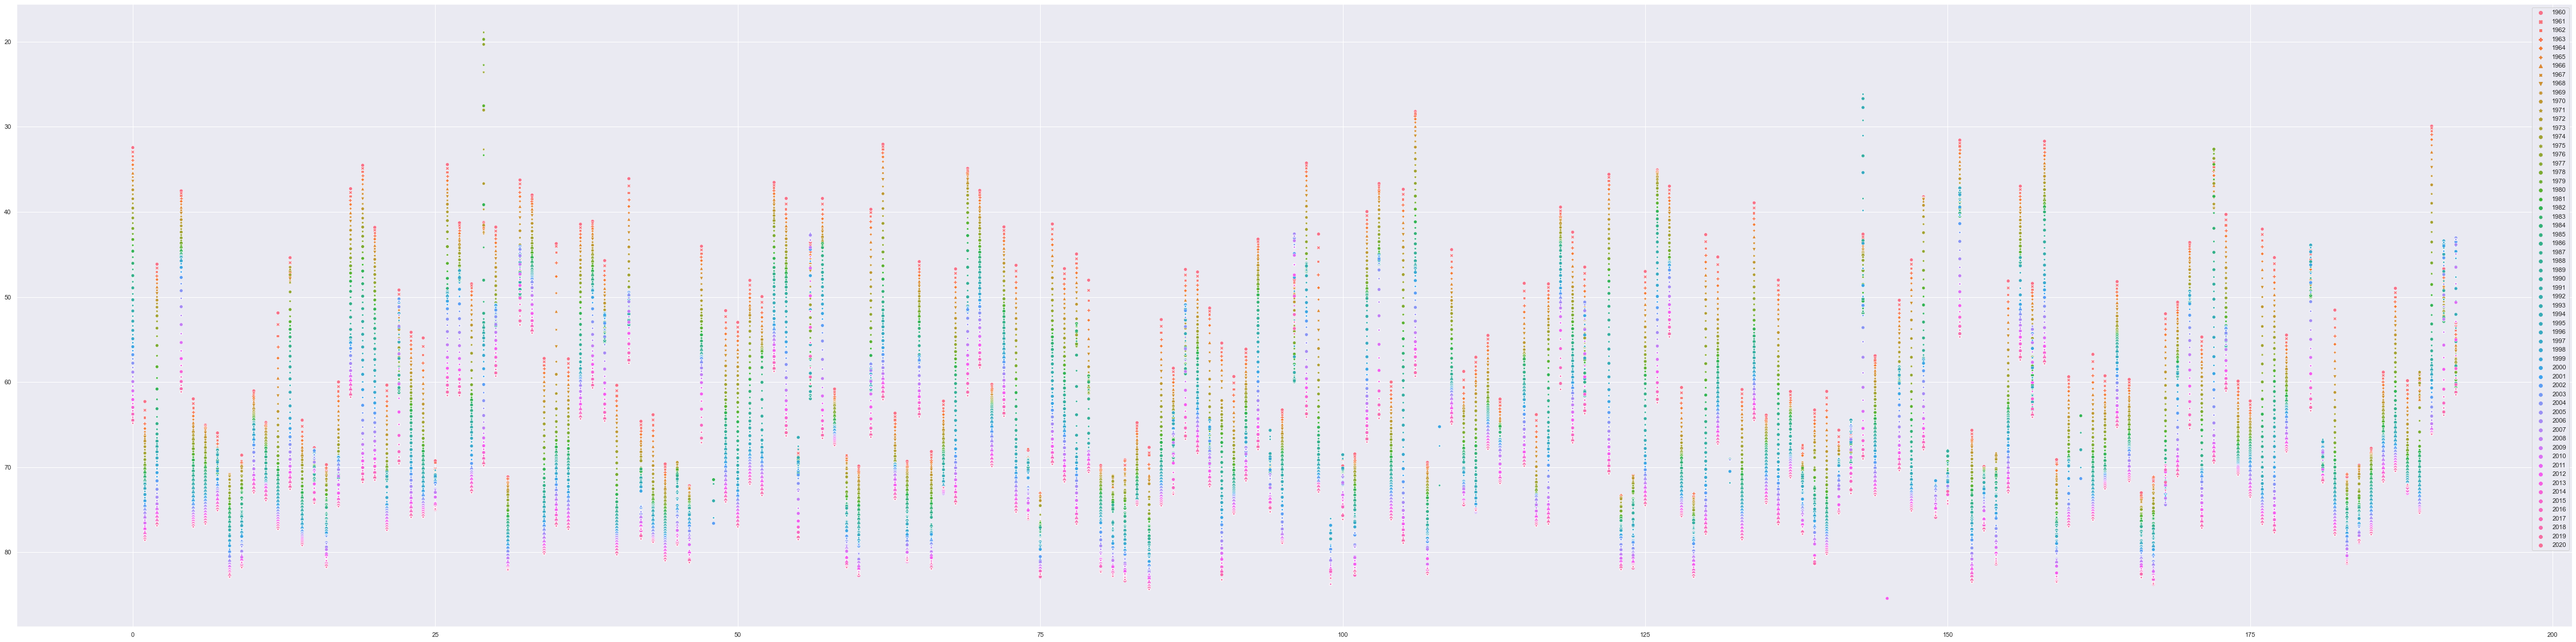

In [34]:
sns.set(rc={'figure.figsize':(80,20)})

sql_d = sqldf("""
SELECT * FROM ESG_by_country 
WHERE "Indicator Name" LIKE 'Life expectancy at birth, total (years)'
""", globals())

sql_d.drop(['Indicator Name'], axis = 1,inplace = True)
sql_d.drop(['Country Name'], axis = 1, inplace = True)
# sql_d = sql_d.transpose()
sns.scatterplot(data = sql_d)

### US Energy and Solar Radiation Analysis

- Renewable Indicies:
    - 'Renewable electricity output (% of total electricity output)'
    - 'Access to electricity (% of population)'
    - 'Electricity production from coal sources (% of total)'
    - 'Renewable energy consumption (% of total final energy consumption)'
- Energy Indicies:
    - 'Energy imports, net (% of energy use)'
    - 'Energy intensity level of primary energy (MJ/2011 PPP GDP)'
    - 'Energy use (kg of oil equivalent per capita)' 
    - 'Fossil fuel energy consumption (% of total)'    
    - 'CO2 emissions (metric tons per capita)'        
- Solar Radiation:
    - 'Cooling Degree Days (projected change in number of degree Celsius)'
    - 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)'
    - 'Heat Index 35 (projected change in days)'
    - 'Mean Drought Index (projected change, unitless)'

In [4]:
ESG_indicies

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)',
       'CO2 emissions (metric tons per capita)',
       'Control of Corruption: Estimate',
       'Cooling Degree Days (projected change in number of degree Celsius)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'E